## Author : Bibek Shah Shankhar

###  Graduate Rotational Internship Program 
## The Sparks Foundation

## Task 2 : Prediction Using Unsupervised ML

In this task we will use the `Iris` [dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) and try to predict the optimum number of clusters and represent it visually.

### Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

`Predicted attribute`: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


### Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. Species:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica



In [1]:
## Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
##Default seaborn style
sns.set()

##This code ignores any warning shown in the notebook
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the iris dataset
iris_data = pd.read_csv('Iris.csv')
print('Data Imported Successfully..')
iris_data.head() # See the first 5 rows

Data Imported Successfully..


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


As we can see the data is imported from url successfully and first five rows from the dataframe is shown.

Lets rename our column names for simplicity

In [3]:
iris_data.rename(columns ={
    'SepalLengthCm':'sepal_length',
    'SepalWidthCm' : 'sepal_width',
    'PetalLengthCm' : 'petal_length',
    'PetalWidthCm' : 'petal_width',
    'Species' : 'species'
}, inplace = True)


Now, lets see the shape of our dataset

In [4]:
iris_data.shape

(150, 6)

There are 150 rows and 4 columns in our iris dataset.

In [5]:
iris_data.describe()

,Id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris_data.corr()

,Id,sepal_length,sepal_width,petal_length,petal_width
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
sepal_length,0.716676,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.882747,0.871754,-0.420516,1.000000,0.962757
petal_width,0.899759,0.817954,-0.356544,0.962757,1.000000


## Data Visualization

First lets create a 2-D scatter plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


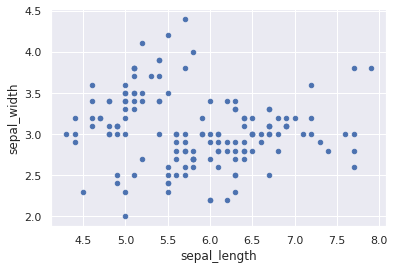

In [7]:
iris_data.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

From the figure above we cannot make a sense whats going in the figure.

Lets add a color to this

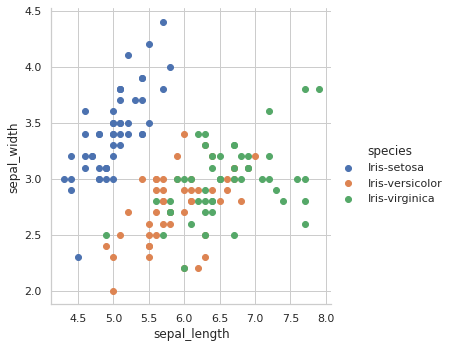

In [8]:
sns.set_style("whitegrid");
sns.FacetGrid(iris_data, hue="species", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

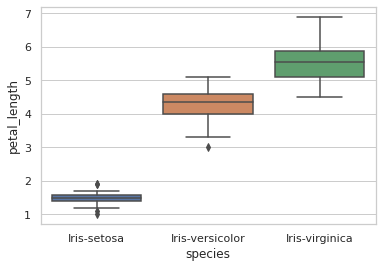

In [9]:
sns.boxplot(x='species',y='petal_length', data=iris_data)
plt.show()

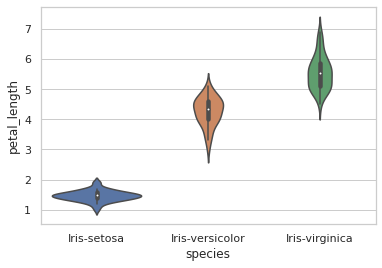

In [10]:
# In a violin plot, thicker data regions are fatter, and finer ones are thinner.
sns.violinplot(x="species", y="petal_length", data=iris_data, size=8)
plt.show()

From the figure we can see that the blue dots are easily separated  but orange and green data points cannot be easily seperated. .

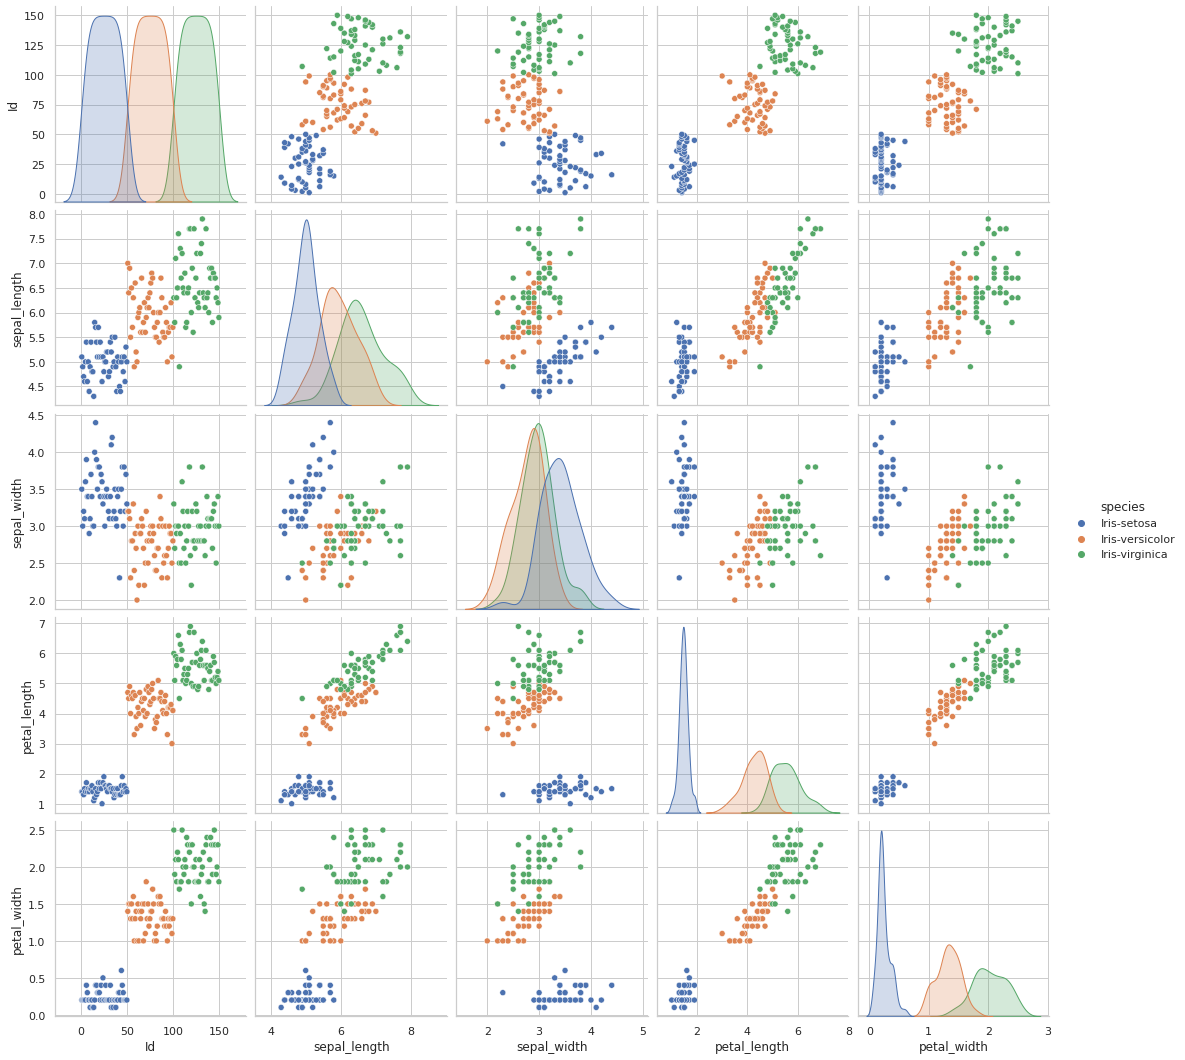

In [11]:
sns.set_style("whitegrid");
sns.pairplot(iris_data, hue="species", size=3);
plt.show()

Observations

1. The most useful features for distinguishing different flower species are petal length and petal width.
2. While Setosa (linearly separable) can be easily recognised, Virnica and Versicolor have some overlap (almost linearly seperable).

### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

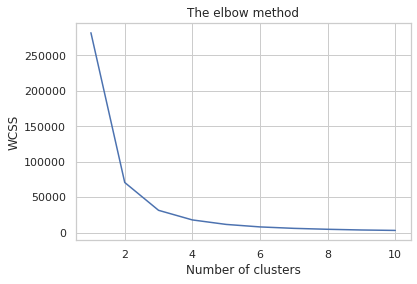

In [12]:
# Finding the optimum number of clusters for k-means classification

x = iris_data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

# Applying kmeans to the dataset

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 1)
y_kmeans = kmeans.fit_predict(x)

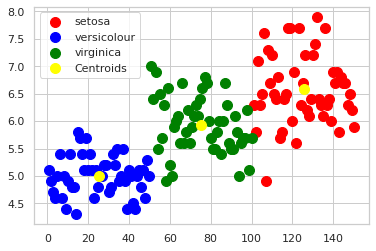

In [14]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## Conclusion

We can easily see from the figure above that there are 3 different clusters or species of iris flower which is separately well from our data.